# Nutrition Daily Meals EDA

## import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
from skimpy import skim
import missingno as msno

## import dataset

In [2]:
data_df = pd.read_csv('./data/Food_and_Nutrition__.csv')
data_df.head()

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.0,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.0,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.0,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,2680,350,42.0,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,Weight Gain
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,1815,250,30.0,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix,Weight Gain


## Understanding the Dataset

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ages                  1698 non-null   int64  
 1   Gender                1698 non-null   object 
 2   Height                1698 non-null   int64  
 3   Weight                1698 non-null   int64  
 4   Activity Level        1698 non-null   object 
 5   Dietary Preference    1698 non-null   object 
 6   Daily Calorie Target  1698 non-null   int64  
 7   Protein               1698 non-null   int64  
 8   Sugar                 1698 non-null   float64
 9   Sodium                1698 non-null   float64
 10  Calories              1698 non-null   int64  
 11  Carbohydrates         1698 non-null   int64  
 12  Fiber                 1698 non-null   float64
 13  Fat                   1698 non-null   int64  
 14  Breakfast Suggestion  1698 non-null   object 
 15  Lunch Suggestion     

In [4]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ages,1698.0,43.961720,15.915002,18.0,30.00,42.00,57.00,79.00
Height,1698.0,174.130153,13.420936,150.0,163.25,174.00,185.00,200.00
Weight,1698.0,78.064193,16.949264,48.0,64.00,78.00,91.00,119.00
Daily Calorie Target,1698.0,2275.171967,558.812405,1200.0,1800.00,2200.00,2689.00,4364.00
Protein,1698.0,139.898115,53.326588,50.0,100.00,136.00,174.00,327.00
Sugar,1698.0,126.192580,34.938902,60.0,100.00,124.00,150.00,218.00
Sodium,1698.0,27.979623,10.665318,10.0,20.00,27.20,34.80,65.40
Calories,1698.0,2196.440518,571.089569,990.0,1770.25,2146.00,2549.75,4357.00
Carbohydrates,1698.0,252.385159,69.877804,120.0,200.00,248.00,300.00,436.00
Fiber,1698.0,30.286219,8.385337,14.4,24.00,29.76,36.00,52.32


In [5]:
data_df.describe(include= "object").T

,count,unique,top,freq
Gender,1698,2,Female,862
Activity Level,1698,5,Moderately Active,420
Dietary Preference,1698,4,Omnivore,564
Breakfast Suggestion,1698,121,Smoothie with protein powder,210
Lunch Suggestion,1698,190,Lentil soup with whole wheat bread,161
Dinner Suggestion,1698,177,Salmon with roasted vegetables,175
Snack Suggestion,1698,112,Trail mix,296
Disease,1698,13,Weight Gain,1312


In [6]:
skim(data_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1698   │ │ int32       │ 8     │                                                          │
│ │ Number of columns │ 19     │ │ string      │ 8     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Ages                    │   0 │     0 │  43.96 │  15.92 │    18 │     30 │     42 │    57 │    79 │ ▇▇▆▆▅▂ │  │
│ │ Height                  │   0 │     0 │  174.1 │  13.42 │   150 │  163.2 │    174 │   185 │   200 │ ▆▇▇▇▇▅ │  │
│ │ Weight                  │   0 │     0 │  78.06 │  16.95 │    48 │     64 │     78 │    91 │   119 │ ▆▇▇▇▃▂ │  │
│ │ Daily Calorie Target    │   0 │     0 │   2275 │  558.8 │  1200 │   1800 │   2200 │  2689 │  4364 │ ▅▇▆▃▁  │  │
│ │ Protein                 │   0 │     0 │  139.9 │  53.33 │    50 │    100 │    136 │   174 │   327 │ ▆▇▇▃▁  │  │
│ │ Sugar                   │   0 │     0 │  126.2 │  34.94 │    60 │    100 │    124 │   150 │   218 │ ▃▇▆▅▃▁ │  │
│ │ Sodium                  │   0 │     0 │  27.98 │  10.67 │    10 │     20 │   27.2 │  34.8 │  65.4 │ ▆▇▇▃▁  │  │
│ │ Calories                │   0 │     0 │   2196 │  571.1 │   990 │   1770 │   2146 │  2550 │  4357 │ ▃▇▇▃▁  │  │
│ │ Carbohydrates           │   0 │     0 │  252.4 │  69.88 │   120 │    200 │    248 │   300 │   436 │ ▃▇▆▅▃▁ │  │
│ │ Fiber                   │   0 │     0 │  30.29 │  8.385 │  14.4 │     24 │  29.76 │    36 │ 52.32 │ ▃▇▆▅▃▁ │  │
│ │ Fat                     │   0 │     0 │   69.7 │  21.43 │    30 │     52 │     69 │    85 │   145 │ ▅▇▇▅▁  │  │
│ └─────────────────────────┴─────┴───────┴────────┴────────┴───────┴────────┴────────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                                │     0 │         0 │                        1 │                1698 │  │
│ │ Activity Level                        │     0 │         0 │                      1.8 │                2993 │  │
│ │ Dietary Preference                    │     0 │         0 │                        1 │                1698 │  │
│ │ Breakfast Suggestion                  │     0 │         0 │                      4.9 │                8269 │  │
│ │ Lunch Suggestion                      │     0 │         0 │                      5.3 │                8941 │  │
│ │ Dinner Suggestion                     │     0 │     

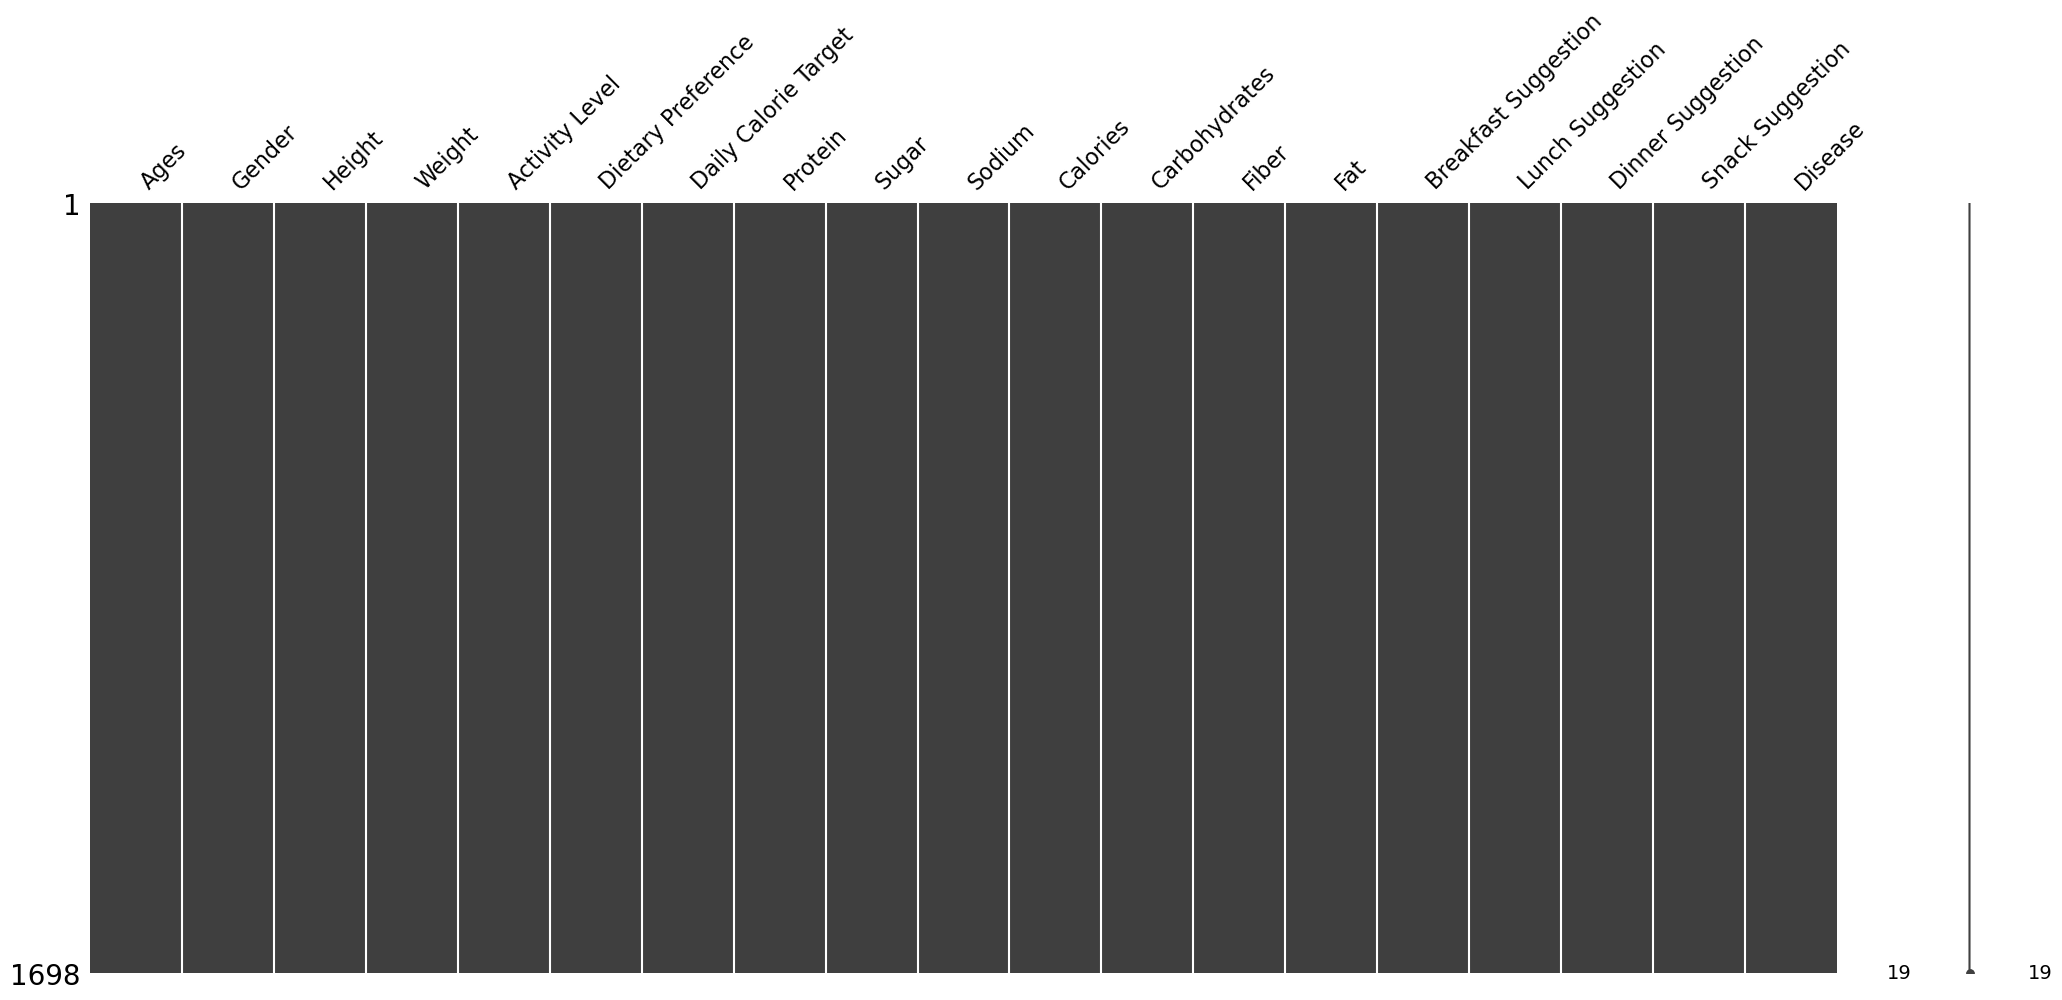

In [7]:
msno.matrix(data_df);

In [8]:
data_df.duplicated().sum()

0

In [9]:
data_df.isnull().sum()

Ages                    0
Gender                  0
Height                  0
Weight                  0
Activity Level          0
Dietary Preference      0
Daily Calorie Target    0
Protein                 0
Sugar                   0
Sodium                  0
Calories                0
Carbohydrates           0
Fiber                   0
Fat                     0
Breakfast Suggestion    0
Lunch Suggestion        0
Dinner Suggestion       0
Snack Suggestion        0
Disease                 0
dtype: int64

## Organizing Columns

In [10]:
data_df.columns

Index(['Ages', 'Gender', 'Height', 'Weight', 'Activity Level',
       'Dietary Preference', 'Daily Calorie Target', 'Protein', 'Sugar',
       'Sodium', 'Calories', 'Carbohydrates', 'Fiber', 'Fat',
       'Breakfast Suggestion', 'Lunch Suggestion', 'Dinner Suggestion',
       'Snack Suggestion', 'Disease'],
      dtype='object')

### 'Ages' column

In [11]:
data_df['Ages'].head()

0    25
1    32
2    48
3    55
4    62
Name: Ages, dtype: int64

In [12]:
data_df['Ages'].nunique()

62

In [13]:
data_df['Ages'].unique()

array([25, 32, 48, 55, 62, 68, 28, 35, 42, 58, 40, 22, 24, 38, 45, 31, 21,
       30, 20, 72, 60, 65, 19, 52, 47, 70, 33, 27, 50, 23, 29, 77, 51, 53,
       79, 39, 74, 18, 59, 46, 34, 44, 56, 57, 61, 36, 63, 37, 41, 69, 26,
       78, 67, 75, 66, 73, 43, 49, 64, 71, 54, 76], dtype=int64)

In [14]:
data_df['Ages'].min()

18

In [15]:
data_df['Ages'].max()

79

In [16]:
data_df['Ages'].dtype

dtype('int64')

### 'Gender' column

In [17]:
data_df['Gender'].nunique()

2

In [18]:
data_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### 'Height' column

In [19]:
data_df['Height'].nunique()

51

In [20]:
data_df['Height'].unique()

array([180, 165, 175, 160, 170, 155, 190, 185, 168, 172, 182, 178, 183,
       158, 162, 163, 161, 188, 196, 156, 169, 153, 194, 198, 184, 192,
       199, 164, 150, 177, 166, 179, 197, 152, 173, 171, 187, 167, 154,
       191, 189, 176, 157, 159, 193, 186, 181, 174, 151, 195, 200],
      dtype=int64)

In [21]:
data_df['Height'].min()

150

In [22]:
data_df['Height'].max()

200

### 'Weight' column

In [23]:
data_df['Weight'].nunique()

71

In [24]:
data_df['Weight'].unique()

array([ 80,  65,  95,  70,  85,  60, 100,  75, 110,  78,  90,  68,  55,
        50,  58,  98,  72,  88,  62,  82, 105,  48, 115, 106,  61, 101,
        96,  59,  53,  93, 112,  79,  97,  76,  54,  57, 111, 107,  92,
        86,  71, 104,  81,  64,  74, 113,  56, 117,  73, 119,  87,  52,
       116,  89,  77, 103, 108,  91, 102,  63,  83, 114,  84, 118,  94,
        67, 109,  66,  69,  51,  99], dtype=int64)

In [25]:
data_df['Weight'].min()

48

In [26]:
data_df['Weight'].max()

119

### 'Activity Level' column

In [27]:
data_df['Activity Level'].nunique()

5

In [28]:
data_df['Activity Level'].unique()

array(['Moderately Active', 'Lightly Active', 'Sedentary', 'Very Active',
       'Extremely Active'], dtype=object)

### 'Dietary Preference' column

In [29]:
data_df['Dietary Preference'].nunique()

4

In [30]:
data_df['Dietary Preference'].unique()

array(['Omnivore', 'Vegetarian', 'Vegan', 'Pescatarian'], dtype=object)

### 'Daily Calorie Target' column 

In [31]:
data_df['Daily Calorie Target'].nunique()

895

In [32]:
data_df['Daily Calorie Target'].dtype

dtype('int64')

In [33]:
data_df['Daily Calorie Target'].min()

1200

In [34]:
data_df['Daily Calorie Target'].max()

4364

### 'Protein' column

In [35]:
data_df['Protein'].nunique()

231

In [36]:
data_df['Protein'].dtype

dtype('int64')

In [37]:
data_df['Protein'].min()

50

In [38]:
data_df['Protein'].max()

327

### 'Sugar' column

In [39]:
data_df['Sugar'].nunique()

276

In [40]:
data_df['Sugar'].dtype

dtype('float64')

In [41]:
data_df['Sugar'].min()

60.0

In [42]:
data_df['Sugar'].max()

218.0

In [43]:
data_df['Sugar'].mean()

126.19257950530036

### 'Sodium' column

In [44]:
data_df['Sodium'].nunique()

231

In [45]:
data_df['Sodium'].dtype

dtype('float64')

In [46]:
data_df['Sodium'].min()

10.0

In [47]:
data_df['Sodium'].max()

65.4

### 'Calories' column

In [48]:
data_df['Calories'].nunique()

759

In [49]:
data_df['Calories'].max()

4357

In [50]:
data_df['Calories'].min()

990

In [51]:
data_df['Calories'].mean()

2196.4405182567725

### 'Carbohydrates' column

In [52]:
data_df['Carbohydrates'].nunique()

276

In [53]:
data_df['Carbohydrates'].max()

436

In [54]:
data_df['Carbohydrates'].min()

120

### 'Fiber' column

In [55]:
data_df['Fiber'].nunique()

276

In [56]:
data_df['Fiber'].dtype

dtype('float64')

In [57]:
data_df['Fiber'].min()

14.4

In [58]:
data_df['Fiber'].max()

52.32

### 'Fat' column

In [59]:
data_df['Fat'].nunique()

103

In [60]:
data_df['Fat'].min()

30

In [61]:
data_df['Fat'].max()

145

In [62]:
data_df['Fat'].dtype

dtype('int64')

### 'Breakfast Suggestion' column

In [63]:
data_df['Breakfast Suggestion'].nunique()

121

In [64]:
data_df['Breakfast Suggestion'].dtype

dtype('O')

In [65]:
data_df['Breakfast Suggestion'].unique()

array(['Oatmeal with berries and nuts', 'Tofu scramble with veggies',
       'Tofu and veggie breakfast burrito',
       'Greek yogurt with granola and fruit',
       'Scrambled eggs with whole wheat toast and avocado',
       'Protein pancakes with fruit and nuts',
       'Tofu and chickpea scramble',
       'Overnight oats with fruit and chia seeds',
       'Tofu scramble with vegetables', 'Wholegrain toast with avocado',
       'Greek yogurt with granola', 'Tofu and vegetable stir-fry',
       'Oatmeal with protein powder and fruit',
       'Eggs with wholegrain toast',
       'Greek yogurt with berries and granola',
       'Eggs with whole wheat toast and avocado',
       'Tofu scramble with vegetables and avocado',
       'Greek yogurt with fruit and granola',
       'Tofu scramble with spinach and avocado',
       'Scrambled eggs with whole wheat toast and fruit',
       'Oatmeal with berries and plant-based milk',
       'Oatmeal with fruit and nuts',
       'Tofu scramble with 

### 'Lunch Suggestion' column

In [66]:
data_df['Lunch Suggestion'].dtype

dtype('O')

In [67]:
data_df['Lunch Suggestion'].nunique()

190

In [68]:
data_df['Lunch Suggestion'].unique()

array(['Grilled chicken salad with mixed greens',
       'Lentil soup with whole wheat bread',
       'Black bean burger on a whole wheat bun',
       'Chicken and vegetable stir-fry',
       'Quinoa salad with chickpeas and vegetables',
       'Lentil pasta with vegetables',
       'Chicken breast with brown rice and vegetables',
       'Lentil burger with sweet potato fries',
       'Lentil soup with wholegrain bread', 'Black bean salad',
       'Tuna salad sandwich on wholegrain bread',
       'Lentil and vegetable stew',
       'Black bean burger on a wholegrain bun',
       'Grilled chicken breast with brown rice',
       'Chicken breast with brown rice',
       'Salmon salad with mixed greens and avocado',
       'Chicken breast with sweet potato and broccoli',
       'Turkey sandwich on whole wheat bread with vegetables',
       'Vegan lentil stew with whole wheat bread',
       'Tuna salad with whole wheat bread',
       'Lentil and vegetable curry with brown rice',
       'Tun

### 'Dinner Suggestion' column

In [69]:
data_df['Dinner Suggestion'].dtype

dtype('O')

In [70]:
data_df['Dinner Suggestion'].nunique()

177

In [71]:
data_df['Dinner Suggestion'].unique()

array(['Salmon with roasted vegetables',
       'Vegetable stir-fry with brown rice', 'Lentil and vegetable curry',
       'Turkey chili with brown rice', 'Vegetarian chili with cornbread',
       'Vegan stir-fry with brown rice',
       'Steak with sweet potato and broccoli',
       'Quinoa and vegetable bowl', 'Vegan chili with cornbread',
       'Vegan pasta with vegetables and sauce',
       'Chickpea and vegetable curry', 'Vegetable stir-fry with tofu',
       'Chicken breast with steamed vegetables', 'Vegan chili',
       'Lentil pasta with vegetables', 'Steak with roasted vegetables',
       'Chicken stir-fry with brown rice',
       'Vegetarian chili with brown rice',
       'Chicken and vegetable stir-fry with brown rice',
       'Tofu stir-fry with brown rice and vegetables',
       'Chicken breast with sweet potato and green beans',
       'Vegan pasta with vegetables and tomato sauce',
       'Black bean burgers with sweet potato fries',
       'Tofu stir-fry with brown ric

### 'Snack Suggestion' column

In [72]:
data_df['Snack Suggestion'].dtype

dtype('O')

In [73]:
data_df['Snack Suggestion'].nunique()

112

In [74]:
data_df['Snack Suggestion'].unique()

array(['Greek yogurt with fruit', 'Apple with almond butter', 'Trail mix',
       'Banana with peanut butter', 'Fruit and nut mix',
       'Hummus and veggie wrap', 'Protein shake',
       'Cottage cheese with fruit', 'Energy bar',
       'Fruit and veggie sticks', 'Trail mix with nuts and seeds',
       'Fruit salad with yogurt', 'Popcorn',
       'Smoothie with protein powder', 'Fruit and nuts', 'Protein bar',
       'Apple with peanut butter', 'Trail mix with nuts and dried fruit',
       'Greek yogurt with fruit and granola', 'Banana with almond butter',
       'Mixed nuts and seeds', 'Apple slices with peanut butter',
       'Fruit smoothie', 'Apple slices with almond butter',
       'Fruit and cheese', 'Fruit and yogurt', 'Fruit salad with nuts',
       'Protein shake with banana', 'Energy bar with nuts and seeds',
       'Smoothie with protein powder and fruit', 'Mixed nuts',
       'Greek yogurt with nuts and seeds',
       'Trail mix with almonds and dried fruit',
       'Frui

### 'Disease' column

In [75]:
data_df['Disease'].dtype

dtype('O')

In [76]:
data_df['Disease'].nunique()

13

In [77]:
data_df['Disease'].unique()

array(['Weight Gain', 'Weight Gain, Hypertension, Heart Disease',
       'Weight Gain, Hypertension, Heart Disease, Kidney Disease',
       'Weight Gain, Kidney Disease',
       'Hypertension, Heart Disease, Kidney Disease',
       'Diabetes, Acne, Weight Gain, Hypertension, Heart Disease, Kidney Disease',
       'Diabetes, Acne, Hypertension, Kidney Disease',
       'Hypertension, Kidney Disease',
       'Diabetes, Acne, Weight Loss, Hypertension, Heart Disease, Kidney Disease',
       'Hypertension, Heart Disease', 'Kidney Disease',
       'Diabetes, Acne, Weight Gain, Hypertension, Heart Disease',
       'Diabetes, Acne, Hypertension, Heart Disease'], dtype=object)

## Data Visualization

In [78]:
#define color
colors = ['#A3D2A3', '#E6B3B3', '#C7E1A6', '#B3E0E0', '#A0D7D7', '#C2C7E1', '#D9E1C3', '#A3C1AD', '#A2D6A6', '#B3E5BB']

### Distribution of Ages

In [79]:
data_df['Ages']

0       25
1       32
2       48
3       55
4       62
        ..
1693    53
1694    38
1695    57
1696    40
1697    54
Name: Ages, Length: 1698, dtype: int64

In [80]:
ages_counts = data_df['Ages'].value_counts()
ages_counts = ages_counts.sort_values()

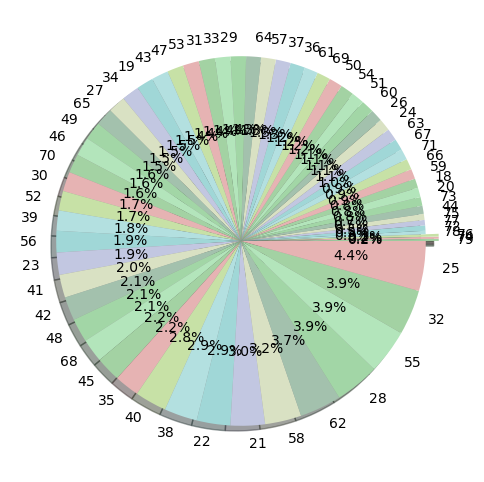

In [81]:
plt.figure(figsize = (20,6))
array = np.zeros(62)  # Tạo mảng toàn 0
array[:3] = 0.07 
plt.pie(ages_counts,
       labels = ages_counts.index,
       autopct='%1.1f%%',
       colors = colors,
       shadow= True,
        explode = array)
plt.show();

In [82]:
ages_counts_df = ages_counts.reset_index()
ages_counts_df.sort_values(by = 'Ages')

,Ages,count
10,18,14
34,19,25
9,20,14
55,21,51
54,22,50
...,...,...
6,75,9
2,76,4
5,77,8
3,78,5


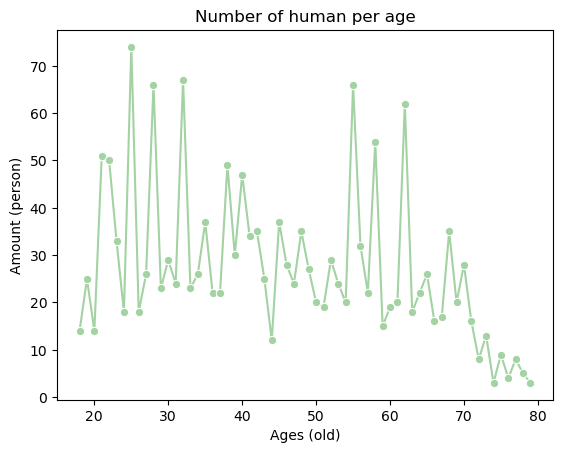

In [83]:
sns.lineplot(data = ages_counts_df,
             x='Ages',
             y='count',
             marker = 'o',
             color = '#A3D2A3'
            )
plt.title('Number of human per age')
plt.xlabel('Ages (old)')
plt.ylabel('Amount (person)')
plt.show();

### Distribution of Gender

In [84]:
gender_counts = data_df['Gender'].value_counts()
gender_counts

Gender
Female    862
Male      836
Name: count, dtype: int64

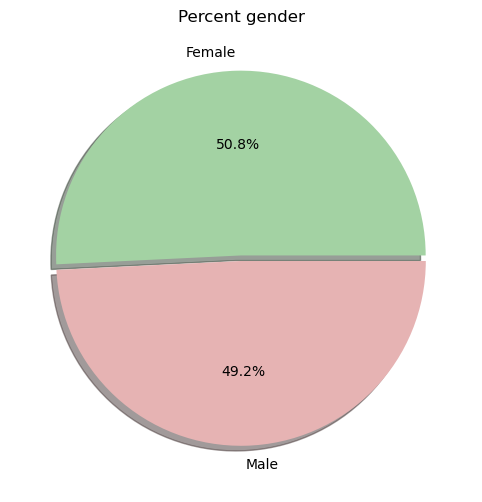

In [85]:
plt.figure(figsize=(10,6))
plt.pie(gender_counts,
       labels = gender_counts.index,
       colors = colors,
        autopct = '%1.1f%%',
        explode = [0.03,0],
        shadow = True
       );
plt.title('Percent gender')
plt.show()

### Distribution of Height

In [86]:
height_count = data_df['Height'].value_counts()
height_count_df = height_count.reset_index().sort_values(by ='Height')
height_count_df.head()

,Height,count
45,150,19
32,151,24
15,152,30
14,153,31
36,154,22


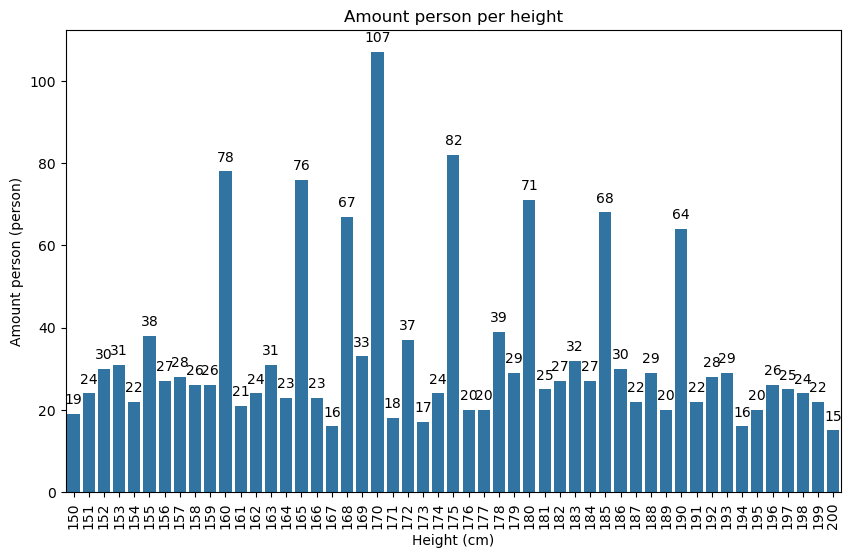

In [87]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data = height_count_df, x = 'Height', y = 'count')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',        
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom',        
                fontsize=10, color='black', xytext=(0, 5), textcoords='offset points') 
plt.xticks(rotation = 90)
plt.title("Amount person per height")
plt.xlabel('Height (cm)')
plt.ylabel('Amount person (person)')
plt.show();

Text(0, 0.5, 'Height (cm)')

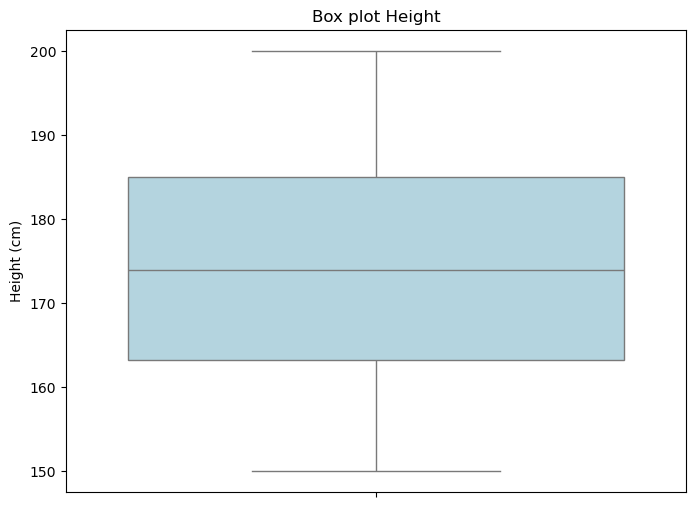

In [88]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = data_df['Height'], color = 'lightblue')
plt.title('Box plot Height')
plt.ylabel("Height (cm)")

### Distribution of Weight

In [89]:
weight_count_df = data_df['Weight'].value_counts().reset_index().sort_values(by = 'Weight')
weight_count_df

,Weight,count
70,48,1
11,50,36
42,51,17
16,52,27
40,53,19
...,...,...
57,115,9
65,116,5
61,117,7
62,118,6


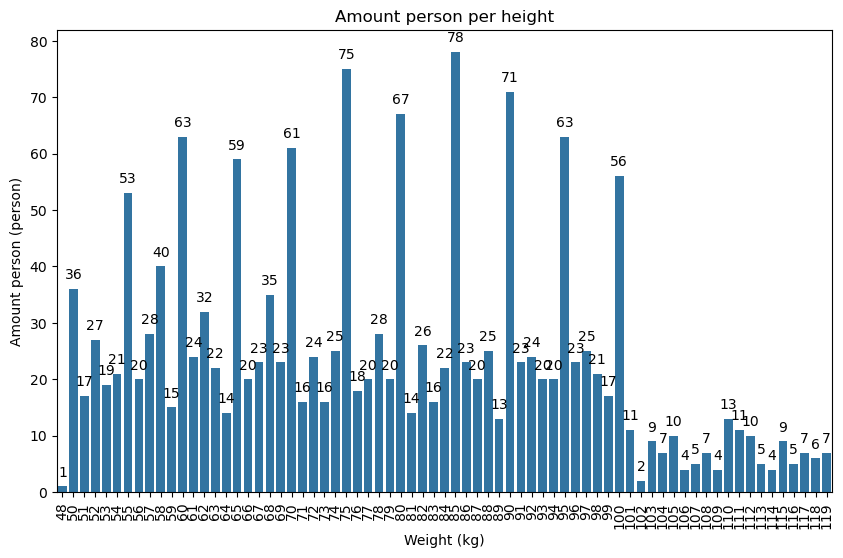

In [90]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data = weight_count_df, x = 'Weight', y = 'count')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',        
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom',        
                fontsize=10, color='black', xytext=(0, 5), textcoords='offset points') 
plt.xticks(rotation = 90)
plt.title("Amount person per height")
plt.xlabel('Weight (kg)')
plt.ylabel('Amount person (person)')
plt.show();

Text(0, 0.5, 'Weight (kg)')

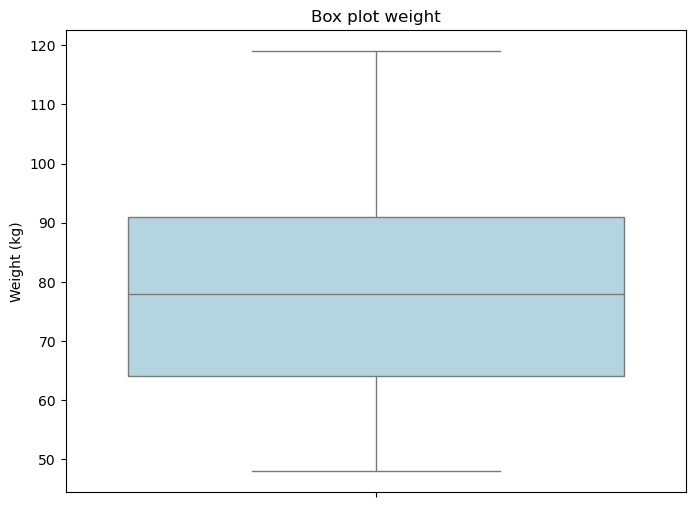

In [91]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = data_df['Weight'], color = 'lightblue')
plt.title('Box plot weight')
plt.ylabel("Weight (kg)")

### Distribution of Activity Level

In [92]:
data_df['Activity Level'].unique()

array(['Moderately Active', 'Lightly Active', 'Sedentary', 'Very Active',
       'Extremely Active'], dtype=object)

In [93]:
act_level_df = data_df['Activity Level'].value_counts()
act_level_df

Activity Level
Moderately Active    420
Sedentary            403
Lightly Active       396
Very Active          341
Extremely Active     138
Name: count, dtype: int64

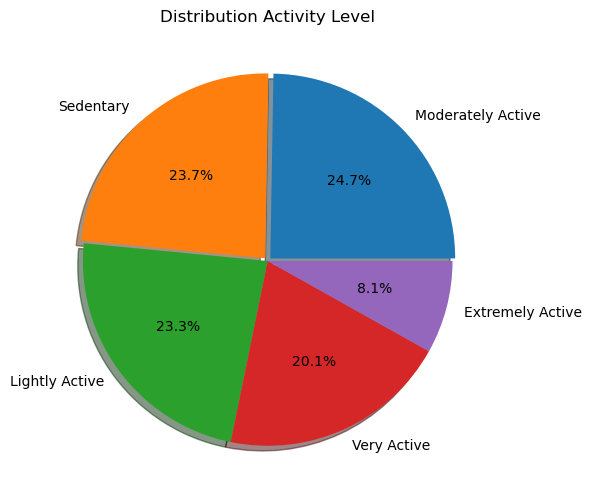

In [94]:
plt.figure(figsize=(10,6))
plt.pie(act_level_df,
       labels = act_level_df.index,
       shadow = True,
        autopct = '%1.1f%%',
       explode = [0.02,0.02,0,0,0])
plt.title('Distribution Activity Level')
plt.show();
        

### Distribution of Dietary Preference

In [95]:
data_df['Dietary Preference'].unique()

array(['Omnivore', 'Vegetarian', 'Vegan', 'Pescatarian'], dtype=object)

In [96]:
diet_pref_counts = data_df['Dietary Preference'].value_counts()
diet_pref_counts

Dietary Preference
Omnivore       564
Vegan          546
Vegetarian     448
Pescatarian    140
Name: count, dtype: int64

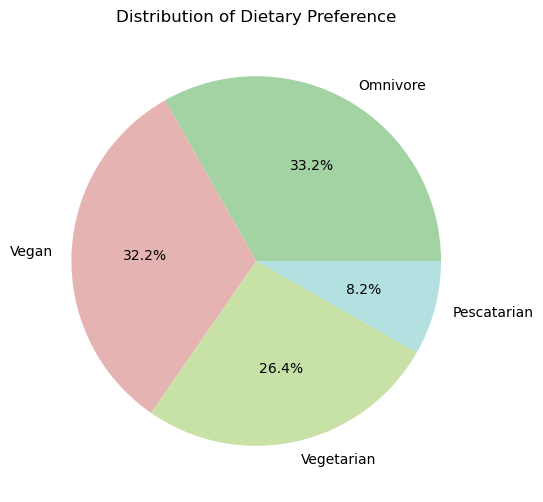

In [97]:
plt.figure(figsize = (10,6))
plt.pie(diet_pref_counts,
       labels = diet_pref_counts.index,
       autopct = '%1.1f%%',
        colors = colors,
       )
plt.title('Distribution of Dietary Preference')
plt.show()

### Distribution of Daily Calorie Target

In [98]:
data_df['Daily Calorie Target'].head()

0    2000
1    1600
2    2200
3    2500
4    2000
Name: Daily Calorie Target, dtype: int64

<Axes: ylabel='Daily Calorie Target'>

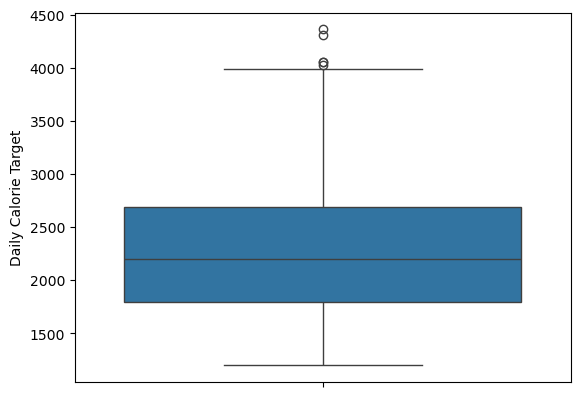

In [99]:
sns.boxplot(data = data_df['Daily Calorie Target'])

### format Disease column

In [100]:
data_df['Disease'].unique()

array(['Weight Gain', 'Weight Gain, Hypertension, Heart Disease',
       'Weight Gain, Hypertension, Heart Disease, Kidney Disease',
       'Weight Gain, Kidney Disease',
       'Hypertension, Heart Disease, Kidney Disease',
       'Diabetes, Acne, Weight Gain, Hypertension, Heart Disease, Kidney Disease',
       'Diabetes, Acne, Hypertension, Kidney Disease',
       'Hypertension, Kidney Disease',
       'Diabetes, Acne, Weight Loss, Hypertension, Heart Disease, Kidney Disease',
       'Hypertension, Heart Disease', 'Kidney Disease',
       'Diabetes, Acne, Weight Gain, Hypertension, Heart Disease',
       'Diabetes, Acne, Hypertension, Heart Disease'], dtype=object)

In [101]:
unique_diseases = set()
for entry in data_df['Disease'].unique():
    diseases = [d.strip() for d in entry.split(',')]  
    unique_diseases.update(diseases)
unique_diseases = sorted(unique_diseases)
unique_diseases

['Acne',
 'Diabetes',
 'Heart Disease',
 'Hypertension',
 'Kidney Disease',
 'Weight Gain',
 'Weight Loss']

In [102]:
#data_df['Weight Gain'] = data_df['Disease'].str.contains('Weight Gain', case=False, na=False)
for disease in unique_diseases:
    data_df[disease] = data_df['Disease'].str.contains(disease, case=False, na=False)

In [103]:
data_df.head()

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,...,Dinner Suggestion,Snack Suggestion,Disease,Acne,Diabetes,Heart Disease,Hypertension,Kidney Disease,Weight Gain,Weight Loss
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,...,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain,False,False,False,False,False,True,False
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,...,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease",False,False,True,True,False,True,False
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,...,Lentil and vegetable curry,Trail mix,Weight Gain,False,False,False,False,False,True,False
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,...,Turkey chili with brown rice,Banana with peanut butter,Weight Gain,False,False,False,False,False,True,False
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,...,Vegetarian chili with cornbread,Fruit and nut mix,Weight Gain,False,False,False,False,False,True,False


### Distribution of Disease

In [104]:
disease_counts = data_df[unique_diseases].sum(axis = 0)
disease_counts

Acne                66
Diabetes            66
Heart Disease      289
Hypertension       292
Kidney Disease     189
Weight Gain       1664
Weight Loss          1
dtype: int64

Text(0.5, 1.0, 'Distribution of Disease')

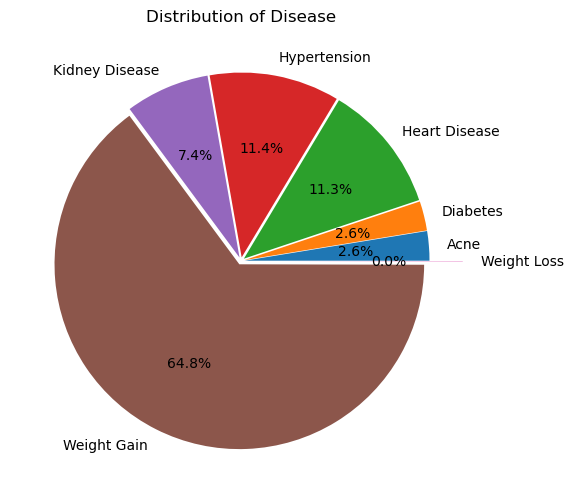

In [105]:
plt.figure(figsize=(10,6))
plt.pie(disease_counts,
       labels = disease_counts.index,
       autopct = '%1.1f%%',
        explode = [0.02,0.02,0.02,0.02,0.02,0.02,0.2],
       )
plt.title('Distribution of Disease')

Word Cloud

In [106]:
mask = np.array(Image.open('./heart_logo.png'))
mask = np.invert(mask)

mask[mask >128] =255
mask[mask <=128] = 0

In [107]:
all_disease = ', '.join(data_df['Disease'].dropna().astype(str).tolist())

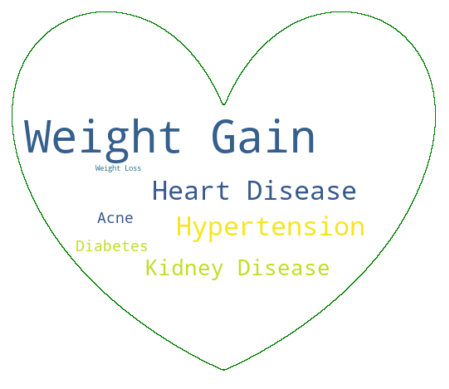

In [108]:
wordcloud = WordCloud(width = 800, height = 400,
                      background_color = 'white',
                      mask = mask,
                      contour_color = 'green',
                      contour_width = 1).generate_from_frequencies(disease_counts)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear');

# Correlation Analysis

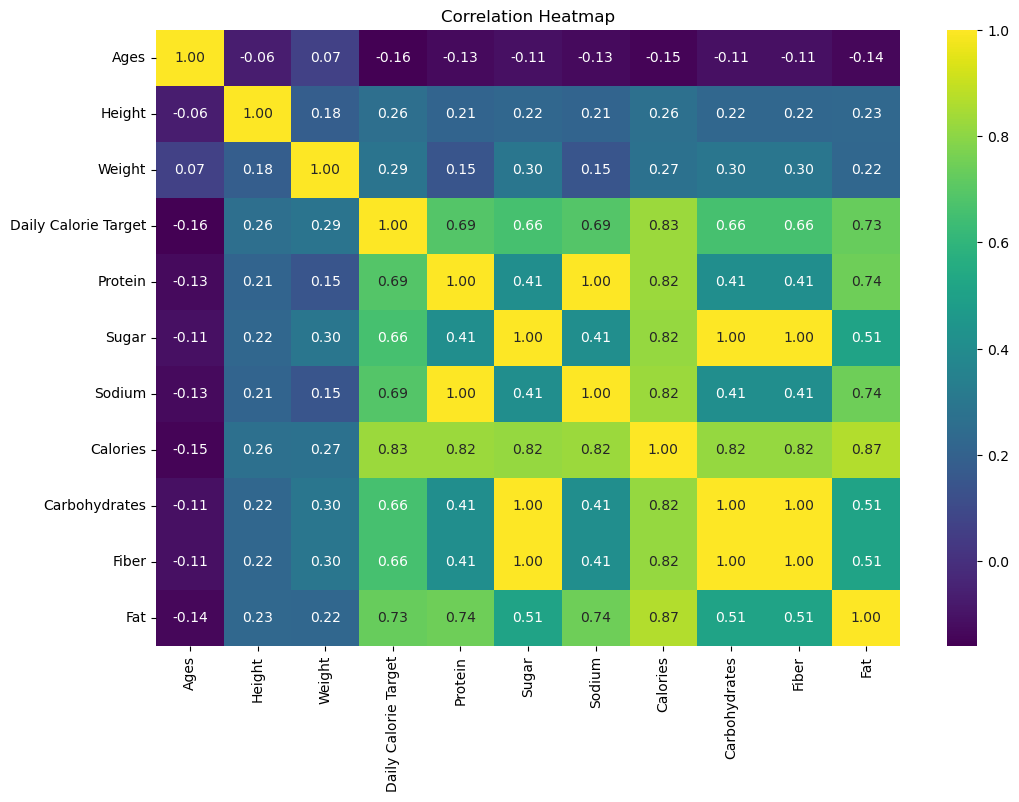

In [109]:
numeric_df = data_df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Check, change type an transform columns

In [110]:
data_df.isnull().sum()

Ages                    0
Gender                  0
Height                  0
Weight                  0
Activity Level          0
Dietary Preference      0
Daily Calorie Target    0
Protein                 0
Sugar                   0
Sodium                  0
Calories                0
Carbohydrates           0
Fiber                   0
Fat                     0
Breakfast Suggestion    0
Lunch Suggestion        0
Dinner Suggestion       0
Snack Suggestion        0
Disease                 0
Acne                    0
Diabetes                0
Heart Disease           0
Hypertension            0
Kidney Disease          0
Weight Gain             0
Weight Loss             0
dtype: int64

In [111]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ages                  1698 non-null   int64  
 1   Gender                1698 non-null   object 
 2   Height                1698 non-null   int64  
 3   Weight                1698 non-null   int64  
 4   Activity Level        1698 non-null   object 
 5   Dietary Preference    1698 non-null   object 
 6   Daily Calorie Target  1698 non-null   int64  
 7   Protein               1698 non-null   int64  
 8   Sugar                 1698 non-null   float64
 9   Sodium                1698 non-null   float64
 10  Calories              1698 non-null   int64  
 11  Carbohydrates         1698 non-null   int64  
 12  Fiber                 1698 non-null   float64
 13  Fat                   1698 non-null   int64  
 14  Breakfast Suggestion  1698 non-null   object 
 15  Lunch Suggestion     

In [119]:
data_df['Gender'] = data_df['Gender'].astype('category')
data_df['Activity Level'] = data_df['Activity Level'].astype('category')
data_df['Dietary Preference'] = data_df['Dietary Preference'].astype('category')
data_df['Breakfast Suggestion'] = data_df['Breakfast Suggestion'].astype('category')
data_df['Lunch Suggestion'] = data_df['Lunch Suggestion'].astype('category')
data_df['Dinner Suggestion'] = data_df['Dinner Suggestion'].astype('category')
data_df['Snack Suggestion'] = data_df['Snack Suggestion'].astype('category')

### Import Lib ML

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [128]:
encoder = LabelEncoder()
category_columns = data_df.select_dtypes(include='category').columns.tolist()
for category in category_columns:
    data_df[category] = encoder.fit_transform(data_df[category])
X = data_df.drop(columns=data_df.select_dtypes(include='bool').columns.tolist())
y = data_df.select_dtypes(include='bool')

In [130]:
X = X.drop(columns = ['Disease'])

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [133]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

In [137]:
rf_clf.score(X_test, y_test)

0.9921568627450981

In [140]:
y_test

,Acne,Diabetes,Heart Disease,Hypertension,Kidney Disease,Weight Gain,Weight Loss
618,False,False,False,False,False,True,False
115,False,False,False,False,False,True,False
135,False,False,False,False,False,True,False
350,False,False,False,False,False,True,False
1395,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
322,False,False,False,False,False,True,False
1233,False,False,False,False,False,True,False
1138,False,False,False,False,False,True,False
701,False,False,False,False,False,True,False


In [149]:
y_pred
y_pred_df = pd.DataFrame(y_pred, columns=y_test.columns)
y_pred_df

,Acne,Diabetes,Heart Disease,Hypertension,Kidney Disease,Weight Gain,Weight Loss
0,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False
2,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
505,False,False,False,False,False,True,False
506,False,False,False,False,False,True,False
507,False,False,False,False,False,True,False
508,False,False,False,False,False,True,False


In [151]:
y_test = y_test.reset_index(drop=True)
y_pred_df = y_pred_df.reset_index(drop=True)


print(y_test == y_pred_df)

     Acne  Diabetes  Heart Disease  Hypertension  Kidney Disease  Weight Gain  \
0    True      True           True          True            True         True   
1    True      True           True          True            True         True   
2    True      True           True          True            True         True   
3    True      True           True          True            True         True   
4    True      True           True          True            True         True   
..    ...       ...            ...           ...             ...          ...   
505  True      True           True          True            True         True   
506  True      True           True          True            True         True   
507  True      True           True          True            True         True   
508  True      True           True          True            True         True   
509  True      True           True          True            True         True   

     Weight Loss  
0       

## Decision tree

### import lib ML

In [153]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 2022)# up depth
rf_model = decision_tree.fit(X_train,y_train)

In [160]:
decision_tree.score(X_test, y_test)

0.9980392156862745